Create a new Python application

In [1]:
# Azure의 Custom Vision 라이브러리를 추가. 예측을 위하여 prediction을 포함
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
# OpenAPI 스펙에 맞춰서 Authentication을 처리할 수 있도록 해주는 코드
from msrest.authentication import ApiKeyCredentials
# Matplotlib의 pyplot을 포함하여 예측 결과를 그리기
from matplotlib import pyplot as plt
# Python Image 라이브러리로 이미지 그리기
from PIL import Image, ImageDraw, ImageFont
# Python Numpy (수학 및 과학 연산 패키지) 포함
import numpy as np
# 파일 처리 작업을 위해 os 라이브러리 포함
import os



Create variables for your resource's Azure endpoint and keys.

In [ ]:
# # 사용자가 만든 AI 모델의 예측기능을 사용하기 위한 endpoint 지정
# prediction_endpoint = 
# prediction_key = 
# # 프로젝트 ID 지정
# project_id = 
# # 모델명 지정
# model_name = 

prediction_endpoint =
prediction_key = 
project_id = 
model_name = 

Authenticate the client

In [3]:
# 앞에서 지정한 API KEY를 써서 커스텀 비전 모델을 사용할 클라이언트를 인증
credientials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
# endpoint 써서 클라이언트 등록
predictor = CustomVisionPredictionClient(endpoint=prediction_endpoint, credentials=credientials)

Load image and get height, width and channels

In [ ]:
# 테스트 이미지를 Codespace workspace에 추가한 후 image_file 변수로 지정
image_file = "./data/test-1.png"
# 이미지 파일 등록되었음을 출력
print('Detecting objects in ', image_file)
# Python Imaging Library의 image open함수를 써서 테스트 이미지 파일 오픈
image = Image.open(image_file)
# Numpy에서 이미지의 shape을 높이, 폭, 채널 읽기
h, w, ch = np.array(image).shape

Detecting objects in  ./data/test-4.png


FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/codespaces-jupyter/data/test-4.png'

Detect objects in the test image

 	 Bungee:  99.67% bbox.left =  0.08, bbox.top =  0.37, bbox.width =  0.62, bbox.height =  0.51
 	 Bungee:  73.68% bbox.left =  0.54, bbox.top =  0.42, bbox.width =  0.46, bbox.height =  0.58
 	 Bungee:  59.41% bbox.left =  0.01, bbox.top =  0.01, bbox.width =  0.12, bbox.height =  0.74
 	 Bungee:  17.97% bbox.left =  0.63, bbox.top =  0.32, bbox.width =  0.36, bbox.height =  0.68
 	 Bungee:  12.61% bbox.left =  0.24, bbox.top =  0.18, bbox.width =  0.41, bbox.height =  0.82
 	 Bungee:  7.91% bbox.left =  0.00, bbox.top =  0.52, bbox.width =  0.02, bbox.height =  0.26
 	 Bungee:  5.72% bbox.left =  0.17, bbox.top =  0.41, bbox.width =  0.83, bbox.height =  0.59
 	 Bungee:  2.98% bbox.left =  0.60, bbox.top =  0.48, bbox.width =  0.40, bbox.height =  0.52
 	 Bungee:  1.59% bbox.left =  0.73, bbox.top =  0.90, bbox.width =  0.27, bbox.height =  0.10
 	 Bungee:  1.53% bbox.left =  0.00, bbox.top =  0.00, bbox.width =  0.29, bbox.height =  1.00
 	 Bungee:  1.49% bbox.left =  0.03, bbox.top

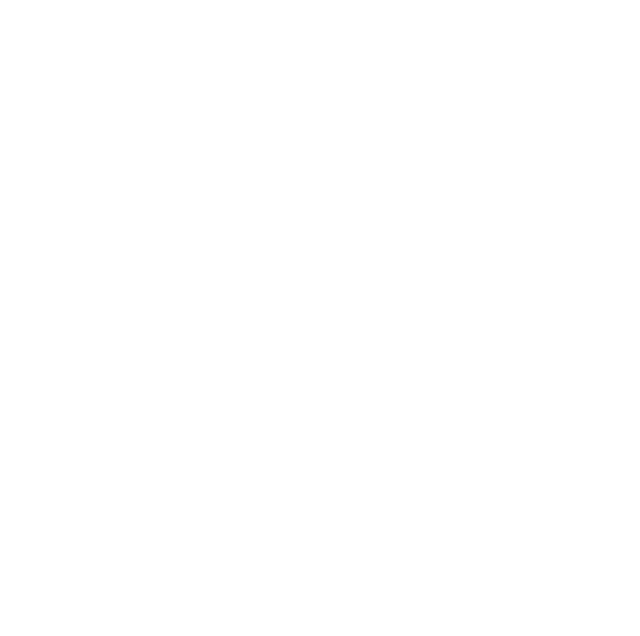

In [ ]:
# 테스트 이미지를 열고 모델에 적용해서 결과를 저장
with open(image_file, mode="rb") as image_data:
    results = predictor.detect_image(project_id, model_name, image_data)

# 예측한 결과를 모두 출력 (텍스트로 표시됨)
for prediction in results.predictions:
    print(" \t " + prediction.tag_name +
          ": {0: .2f}% bbox.left = {1: .2f}, bbox.top = {2: .2f}, bbox.width = {3: .2f}, bbox.height = {4: .2f}" .format(prediction.probability *100, prediction.bounding_box.left, prediction.bounding_box.top, prediction.bounding_box.width, prediction.bounding_box.height))



# 그래프 크기 지정하고 축 비활성화
fig = plt.figure(figsize=(8, 8))
plt.axis('off')

# 테스트 이미지를 그리기
# 개체 인식 박스를 magenta로 지정
draw = ImageDraw.Draw(image)
lineWidth = int(w/100)
color = 'magenta'

Create a figure for the results
Display the image with boxes around each detected object

Results saved in  output.jpg


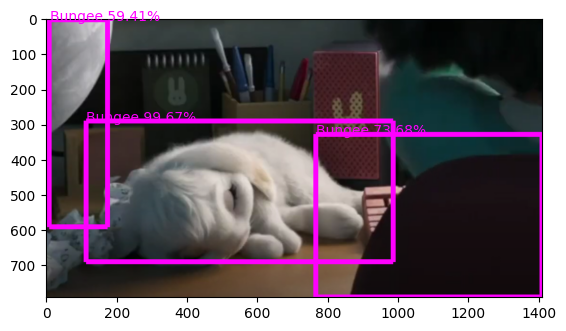

In [ ]:
# 개체 인식된 모든 결과에 대해서ㅓ
for prediction in results.predictions:

    # 확률이 50%이 이상인 경우 bounding box 값을 읽음
    if (prediction.probability*100) >50:
        left = prediction.bounding_box.left * w
        top = prediction.bounding_box.top * h
        width = prediction.bounding_box.width * w
        height = prediction.bounding_box.height * h

        # bounding 값을 magenta 색으로 표시
        points =((left, top), (left+width, top), (left+width, top+height), (left, top+height), (left, top))
        draw.line(points, fill = color, width=lineWidth)
        plt.annotate(prediction.tag_name + ' {0:.2f}% ' .format(prediction.probability * 100), (left, top), color=color)

# boundingbox 표시된 이미지를 output.jpg로 저정
plt.imshow(image)
outputfile = 'output.jpg'
fig.savefig(outputfile)
print("Results saved in ", outputfile)